## Data Science for Political Campaigns Assignment 2: Cali Runtas
### Due 9/19/2019

## Available / Necessary Data Fields and Definitions

 vf_g2016 - 2016 general election
 
 vf_g2018 - 2018 general election

 vf_p2018_party - 2018 primary party - D,R,NaN
 
 vf_registration_date - date of registration, number format YYYYMMDD
 
 vf_voter_status - whether voter considered active or inactive by secretary of state
 
 vf_county_name - name of county
 
 voterbase_id - unique id
 
 voterbase_age - age, as of the release date - 20190828
 
 voterbase_marital_status - marital status
 
 voterbase_gender - gender
 
 voterbase_race - race
 
 tsmart_partisan_score - partisanship score - higher score indidcates higher liklihood of supporting democratic party

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt

#options for settings I want
pd.options.mode.chained_assignment = None
%matplotlib inline

In [2]:
#import data file, load to dataframe
file = 'ohio_voterfile_10pct.csv'

df_ohio_vf = pd.read_csv(file,low_memory = False)

In [3]:
#explore fields
df_ohio_vf.describe()

,tsmart_zip,vf_reg_cass_zip,vf_registration_date,vf_earliest_registration_date,vf_county_code,vf_cd,vf_sd,vf_hd,vf_county_council,vf_city_council,...,tsmart_presidential_general_turnout_score,tsmart_midterm_general_turnout_score,tsmart_midterm_general_enthusiasm_score,tsmart_offyear_general_turnout_score,tsmart_presidential_primary_turnout_score,tsmart_non_presidential_primary_turnout_score,voterbase_age,deceased_flag_date_of_death,vf_missing_occupancy_flag,vf_pav
count,760097.000000,760097.000000,7.296200e+05,7.296200e+05,760097.000000,760097.000000,760097.000000,760097.000000,85272.000000,0.0,...,760097.000000,760097.000000,760097.000000,760097.000000,760097.000000,760097.000000,760085.000000,2.540000e+02,0.0,0.0
mean,44349.008807,44349.087265,2.005312e+07,2.003509e+07,81.003142,8.526716,16.856696,49.529163,6.032039,NaN,...,74.766173,53.346607,43.674446,34.838549,40.372177,19.330312,49.902715,2.005474e+07,NaN,NaN
std,841.598630,841.627540,1.332242e+05,1.334046e+05,47.998363,4.642992,9.453014,28.368796,3.185479,NaN,...,26.097281,34.278661,28.442630,32.834883,30.271188,23.911824,18.508834,8.050641e+04,NaN,NaN
min,43001.000000,43001.000000,1.930092e+07,1.904100e+07,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,...,1.100000,0.400000,0.400000,0.000000,0.100000,0.100000,17.000000,1.964010e+07,NaN,NaN
25%,43613.000000,43613.000000,1.998071e+07,1.996020e+07,41.000000,4.000000,9.000000,25.000000,3.000000,NaN,...,55.000000,20.100000,18.000000,4.700000,11.200000,2.400000,34.000000,2.001015e+07,NaN,NaN
50%,44234.000000,44234.000000,2.010100e+07,2.007091e+07,63.000000,9.000000,17.000000,49.000000,6.000000,NaN,...,87.600000,58.400000,38.300000,21.000000,35.700000,8.200000,50.000000,2.007011e+07,NaN,NaN
75%,45140.000000,45140.000000,2.016032e+07,2.015010e+07,113.000000,13.000000,25.000000,74.000000,9.000000,NaN,...,96.600000,87.400000,72.200000,67.700000,65.700000,25.900000,64.000000,2.011051e+07,NaN,NaN
max,45899.000000,45899.000000,2.019070e+07,2.019070e+07,175.000000,16.000000,33.000000,99.000000,11.000000,NaN,...,99.400000,97.400000,97.200000,94.100000,96.300000,87.700000,115.000000,2.018113e+07,NaN,NaN


In [4]:
#continue exploring fields
df_ohio_vf.head()

,voterbase_id,tsmart_city,tsmart_state,tsmart_zip,vf_reg_cass_city,vf_reg_cass_state,vf_reg_cass_zip,vf_registration_date,vf_earliest_registration_date,vf_party,...,voterbase_race,voterbase_marital_status,vf_voter_status,voterbase_deceased_flag,deceased_flag_date_of_death,voterbase_mailable_flag,vf_missing_occupancy_flag,vf_absentee_status,vf_early_voter_status,vf_pav
0,OH-000005341238,STRONGSVILLE,OH,44136,STRONGSVILLE,OH,44136,20160315.0,20040522.0,Unaffiliated,...,Caucasian,Married,Active,NaN,NaN,Yes,NaN,NaN,NaN,NaN
1,OH-13392194,CANFIELD,OH,44406,CANFIELD,OH,44406,20181016.0,20181016.0,Unaffiliated,...,Caucasian,Unmarried,Active,NaN,NaN,Yes,NaN,Yes,Yes,NaN
2,OH-13412773,COLUMBUS,OH,43228,COLUMBUS,OH,43228,20181106.0,20181106.0,Unaffiliated,...,Caucasian,Unmarried,Inactive,NaN,NaN,Yes,NaN,NaN,NaN,NaN
3,OH-000002032787,MORELAND HILLS,OH,44022,MORELAND HILLS,OH,44022,20181014.0,19970819.0,Unaffiliated,...,Caucasian,Married,Active,NaN,NaN,Yes,NaN,NaN,NaN,NaN
4,OH-000006803202,COLUMBUS,OH,43209,COLUMBUS,OH,43209,NaN,NaN,Unaffiliated,...,Caucasian,Unmarried,Active,NaN,NaN,Yes,NaN,NaN,NaN,NaN


In [5]:
#slice to only fields I need
oh_keep = ['vf_registration_date','vf_g2016','vf_g2018','vf_p2018_party','vf_voter_status','vf_county_name','voterbase_id','voterbase_age','voterbase_marital_status','voterbase_gender','voterbase_race','tsmart_partisan_score']
df = df_ohio_vf[oh_keep]

In [6]:
#create new field for age groups using typical bands used in political polls
ranges = [0,29.99,44.99,64.99,np.inf]
col_names = ['18-29', '30-45', '46-65', '65 and Over']

df['vf_age_group'] = pd.cut(df['voterbase_age'], ranges, labels=col_names)

In [7]:
#look at variables kept
df.head()

,vf_registration_date,vf_g2016,vf_g2018,vf_p2018_party,vf_voter_status,vf_county_name,voterbase_id,voterbase_age,voterbase_marital_status,voterbase_gender,voterbase_race,tsmart_partisan_score,vf_age_group
0,20160315.0,Y,Y,NaN,Active,CUYAHOGA,OH-000005341238,42.0,Married,Female,Caucasian,99.2,30-45
1,20181016.0,F,NaN,NaN,Active,MAHONING,OH-13392194,73.0,Unmarried,Female,Caucasian,56.3,65 and Over
2,20181106.0,NaN,NaN,NaN,Inactive,FRANKLIN,OH-13412773,24.0,Unmarried,Male,Caucasian,61.1,18-29
3,20181014.0,Y,NaN,NaN,Active,CUYAHOGA,OH-000002032787,40.0,Married,Male,Caucasian,39.6,30-45
4,NaN,Y,Y,D,Active,FRANKLIN,OH-000006803202,63.0,Unmarried,Female,Caucasian,99.5,46-65


### How do the 2016 and 2018 electorates (those with turnout = "Y" --UPDATED TO TURNOUT NE NULL -- for each general election) differ from the total populations of registered voters in terms of basic demographics (gender, age, marital status, and race)? (For the purpose of this assignment, don’t worry about whether any 2016 or 2018 voters have been dropped from the  voter file since those elections, just assume that they’re all still included.)

In [8]:
#define function to get election results by demographic info for 2016 and 2018 
def election_info(dem_var,data_frame):
    count_16 = data_frame.dropna(subset = ['vf_g2016']).groupby(dem_var).count()['voterbase_id']
    count_18 = data_frame.dropna(subset = ['vf_g2018']).groupby(dem_var).count()['voterbase_id']
    count_registered = data_frame.groupby(dem_var).count()['voterbase_id']
    return_data = {
        'election_2016_cnt':count_16,
        'election_2016_pct':count_16/count_16.sum(),
        'election_2018_cnt':count_18,
        'election_2018_pct':count_18/count_18.sum(),
        'registered_cnt':count_registered,
        'registered_pct':count_registered/count_registered.sum()
    }
    return pd.DataFrame(return_data,columns =['election_2016_cnt','election_2018_cnt','registered_cnt','election_2016_pct','election_2018_pct','registered_pct'])

In [9]:
#get election info by gender
gender_info = election_info('voterbase_gender',df)
gender_info

,election_2016_cnt,election_2018_cnt,registered_cnt,election_2016_pct,election_2018_pct,registered_pct
voterbase_gender,,,,,,
Female,274675,228112,370066,0.512006,0.503062,0.486867
Male,242436,208804,344891,0.451911,0.460482,0.453746
Unknown,19357,16531,45140,0.036082,0.036456,0.059387


In [10]:
#get election info by age group
age_grp_info = election_info('vf_age_group',df)
age_grp_info

,election_2016_cnt,election_2018_cnt,registered_cnt,election_2016_pct,election_2018_pct,registered_pct
vf_age_group,,,,,,
18-29,55791,45672,134145,0.103997,0.100722,0.176487
30-45,115224,88398,182265,0.214784,0.194948,0.239796
46-65,205151,174405,259789,0.382413,0.384622,0.341789
65 and Over,160299,144970,183886,0.298806,0.319708,0.241928


In [11]:
#get election info by marital status
marital_info = election_info('voterbase_marital_status',df)
marital_info

,election_2016_cnt,election_2018_cnt,registered_cnt,election_2016_pct,election_2018_pct,registered_pct
voterbase_marital_status,,,,,,
Married,281779,247660,336677,0.525248,0.546172,0.442940
Unknown,21465,16301,40529,0.040012,0.035949,0.053321
Unmarried,233224,189486,382891,0.434740,0.417879,0.503740


In [12]:
#get election info by race
race_info = election_info('voterbase_race',df)
race_info

,election_2016_cnt,election_2018_cnt,registered_cnt,election_2016_pct,election_2018_pct,registered_pct
voterbase_race,,,,,,
African-American,41515,33103,70009,0.077386,0.073003,0.092105
Asian,1618,1465,2670,0.003016,0.003231,0.003513
Caucasian,481431,409499,665888,0.897409,0.903080,0.876057
Hispanic,2228,1446,4588,0.004153,0.003189,0.006036
Native American,59,48,94,0.000110,0.000106,0.000124
Uncoded,9617,7886,16848,0.017927,0.017391,0.022166


### Compare how partisanship scores (tsmart_partisan_score) vary based on whether a given individual voted in a Democratic primary election in 2018, a Republican primary in 2018, or did not vote in a party primary in 2018.


tsmart_partisan_score                                         \
                               count       mean        std  min   25%   50%   
vf_p2018_party                                                                
D                            70495.0  79.656075  31.400597  0.7  64.7  98.8   
G                              395.0  58.844557  39.566909  1.0  16.7  71.0   
N/A                         604226.0  49.563015  37.163721  0.5  12.7  44.4   
R                            84981.0  14.150463  22.809783  0.6   1.3   2.3   

                            
                 75%   max  
vf_p2018_party              
D               99.3  99.9  
G               98.5  99.9  
N/A             91.9  99.9  
R               16.6  99.7

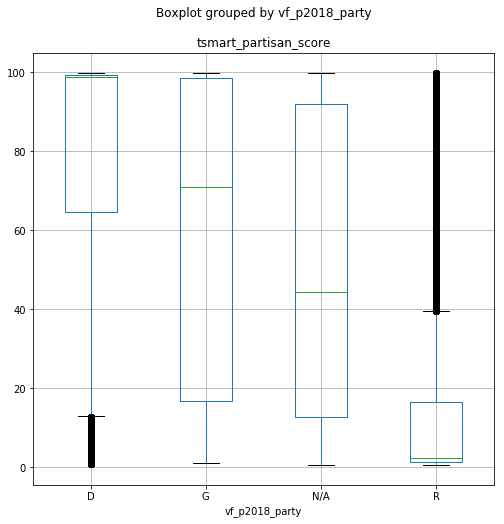

In [13]:
display(df[['vf_p2018_party','tsmart_partisan_score']].fillna('N/A').groupby('vf_p2018_party').describe())
df[['vf_p2018_party','tsmart_partisan_score']].fillna('N/A').boxplot('tsmart_partisan_score',by='vf_p2018_party',figsize=(8,8));

### How are partisanship scores correlated with demographics (gender, age, marital status, and race) across the population?


In [14]:
#define function to see how these correlations look
def partisan_info(dem_var,data_frame,fs=(10,10)):
    display(data_frame.groupby(dem_var).tsmart_partisan_score.describe());
    return df[['tsmart_partisan_score',dem_var]].boxplot('tsmart_partisan_score',by=dem_var,figsize=fs);

,count,mean,std,min,25%,50%,75%,max
voterbase_gender,,,,,,,,
Female,370066.0,52.479572,38.477440,0.6,12.5,51.9,95.7,99.9
Male,344891.0,41.511753,37.359184,0.5,7.1,27.3,83.9,99.9
Unknown,45140.0,67.577448,33.247574,0.6,38.8,82.6,97.1,99.9


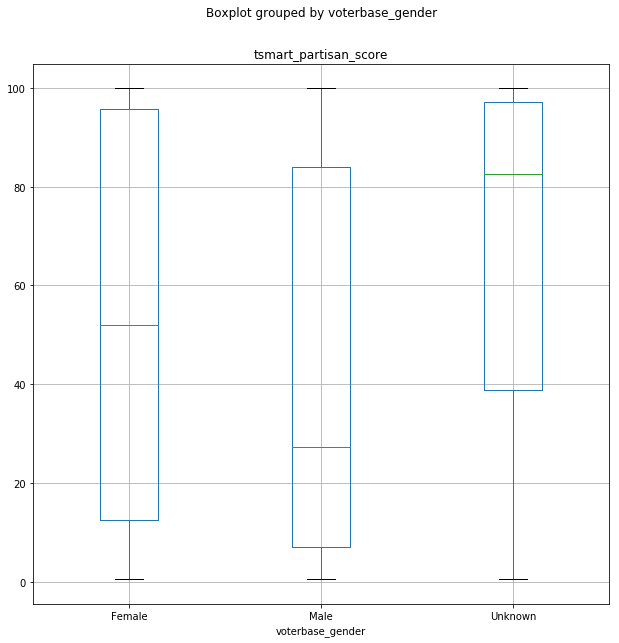

In [15]:
#see how partisan scores are correlated to gender
partisan_info('voterbase_gender',df)

,count,mean,std,min,25%,50%,75%,max
vf_age_group,,,,,,,,
18-29,134145.0,57.322869,34.917471,0.6,22.2,63.3,92.7,99.9
30-45,182265.0,52.674978,36.645123,0.5,16.0,51.7,93.1,99.9
46-65,259789.0,43.847940,38.666454,0.6,6.7,30.4,91.8,99.8
65 and Over,183886.0,44.082324,40.304983,0.6,3.3,29.4,95.6,99.8


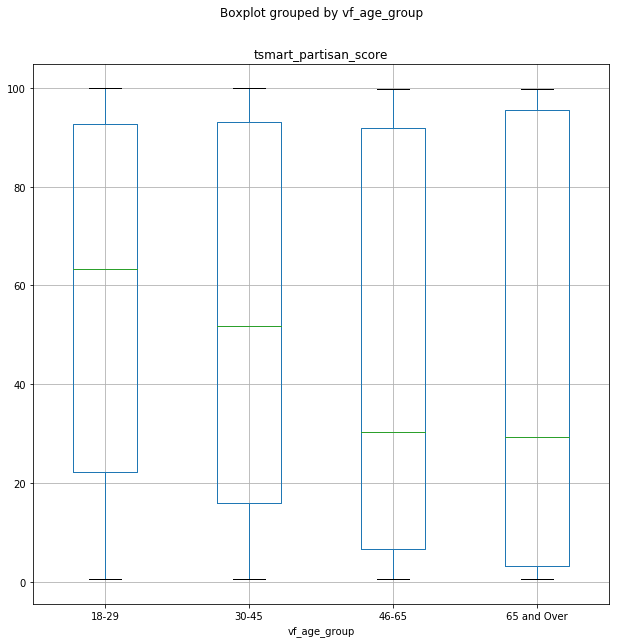

In [16]:
#see how partisan scores are correlated to age group
partisan_info('vf_age_group',df)

,count,mean,std,min,25%,50%,75%,max
voterbase_age,,,,,,,,
17.0,1.0,21.700000,NaN,21.7,21.700,21.70,21.700,21.7
18.0,1550.0,47.063161,27.986972,4.0,22.200,44.95,68.850,98.8
19.0,7322.0,43.524338,32.901122,1.1,12.825,35.20,76.100,99.4
20.0,8328.0,46.907829,33.446001,0.9,14.500,41.45,81.200,99.5
21.0,11273.0,50.386552,35.036865,0.6,15.400,48.00,87.600,99.8
22.0,12322.0,55.350349,35.565179,0.6,19.025,59.50,92.000,99.9
23.0,12461.0,57.147813,35.237042,0.6,21.200,63.20,92.700,99.9
24.0,12643.0,58.899518,34.627507,0.6,24.500,66.40,93.400,99.9
25.0,13402.0,59.986233,34.691281,0.8,25.800,68.90,94.000,99.9


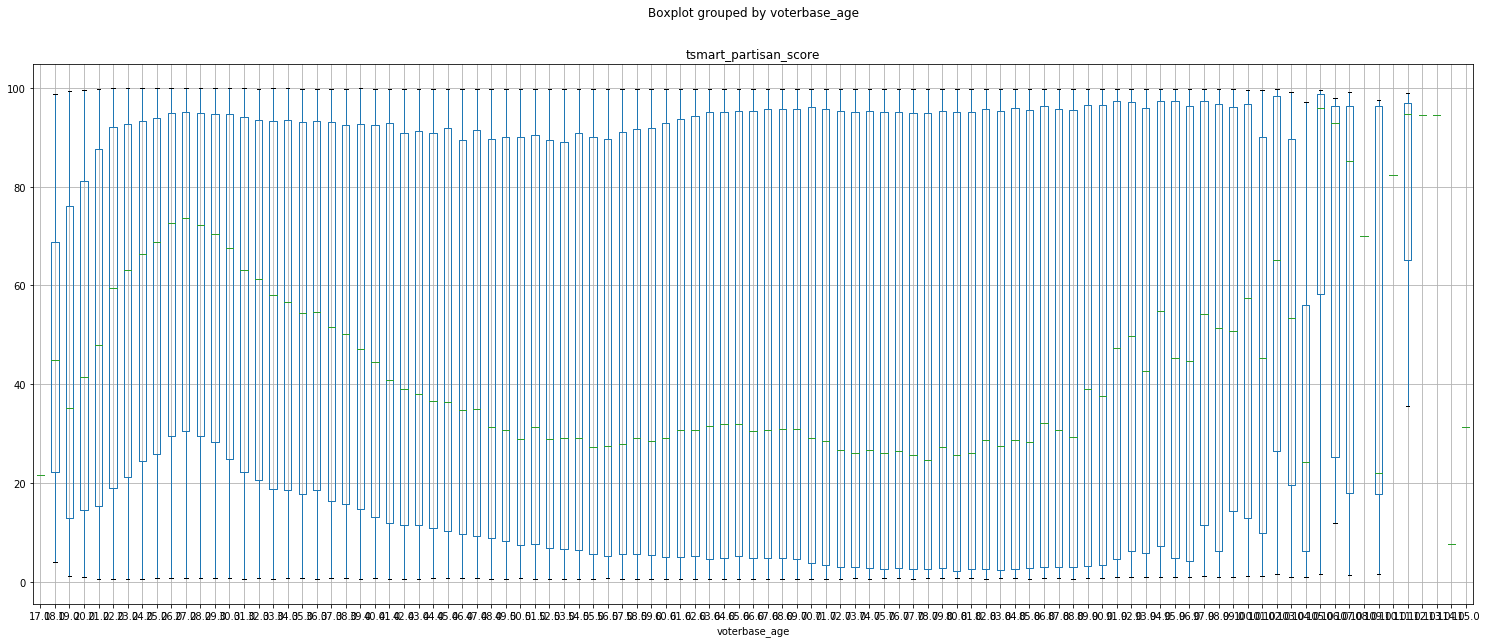

In [17]:
#see how partisan scores are correlated to actual voter age (just out of curiosity)
partisan_info('voterbase_age',df, (25,10))

,count,mean,std,min,25%,50%,75%,max
voterbase_marital_status,,,,,,,,
Married,336677.0,35.453749,36.875594,0.5,3.4,18.5,66.8,99.9
Unknown,40529.0,55.610923,36.652535,0.7,18.9,58.7,94.8,99.9
Unmarried,382891.0,59.019576,36.291559,0.6,22.8,66.9,96.0,99.9


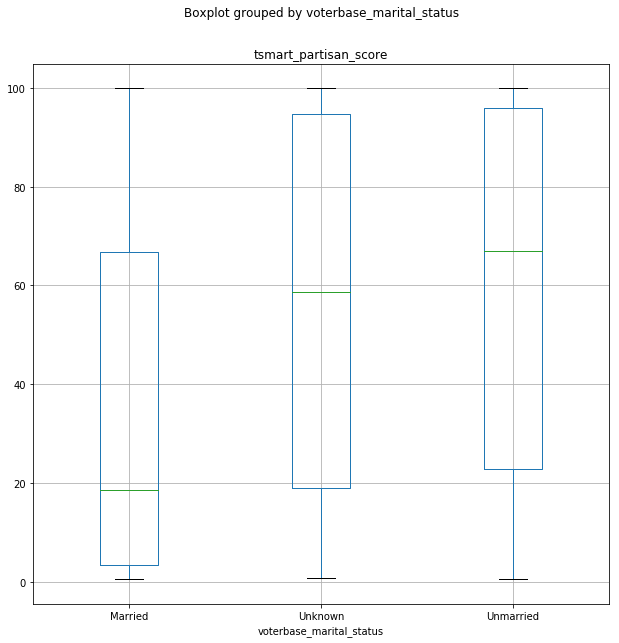

In [18]:
##see how partisan scores are correlated to marital status
partisan_info('voterbase_marital_status',df)

,count,mean,std,min,25%,50%,75%,max
voterbase_race,,,,,,,,
African-American,70009.0,94.498537,13.904150,1.1,95.9,97.9,99.200,99.9
Asian,2670.0,60.929775,32.205449,0.9,32.5,68.5,91.300,99.8
Caucasian,665888.0,42.857654,36.807006,0.5,7.8,31.9,82.100,99.9
Hispanic,4588.0,81.939037,24.306787,0.8,79.8,92.1,96.900,99.8
Native American,94.0,66.572340,33.692932,1.1,44.4,80.5,95.875,99.6
Uncoded,16848.0,64.658060,32.457174,0.7,38.1,75.4,94.300,99.9


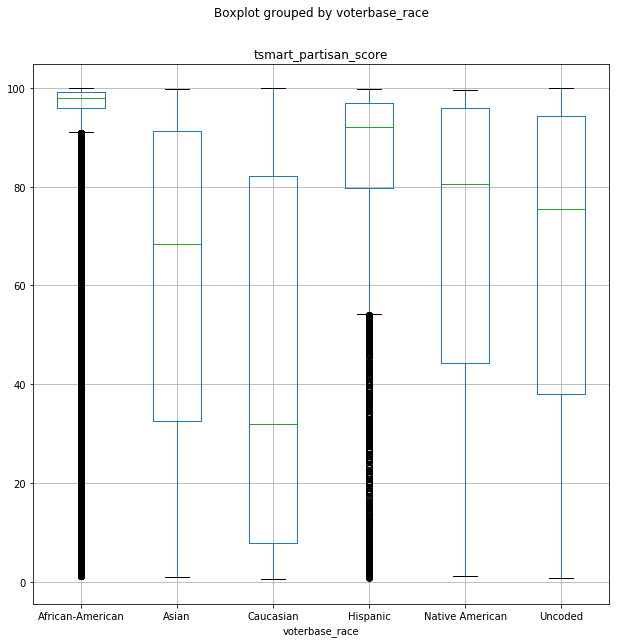

In [19]:
##see how partisan scores are correlated to race
partisan_info('voterbase_race',df)

### Create a graph of the number of new/updated registrations by month over the past 8 years (you’ll need to parse the vf_registration_date field, which is given as a string in “YYYYMMDD” format). What patterns do you see?


In [20]:
#parse vf_registration_date field
df['vf_registration_mth'] = pd.to_datetime(df['vf_registration_date'], format='%Y%m%d.0').dt.month

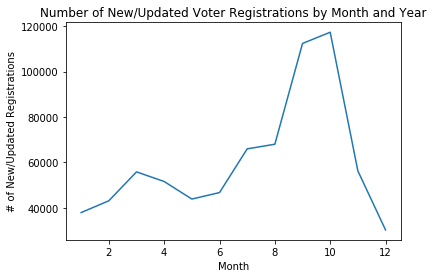

In [21]:
plt.plot(df.groupby('vf_registration_mth').count()['voterbase_id'])
     
plt.title('Number of New/Updated Voter Registrations by Month and Year',fontsize = 12);
plt.xlabel('Month')
plt.ylabel('# of New/Updated Registrations')
plt.show()

#### We see that the number of voters registering or updating their registration is highest in the fall to early winter -- from August to November and lower the rest of the year.

### How does the population of inactive registrants (as a proportion of the total electorate) vary across counties?

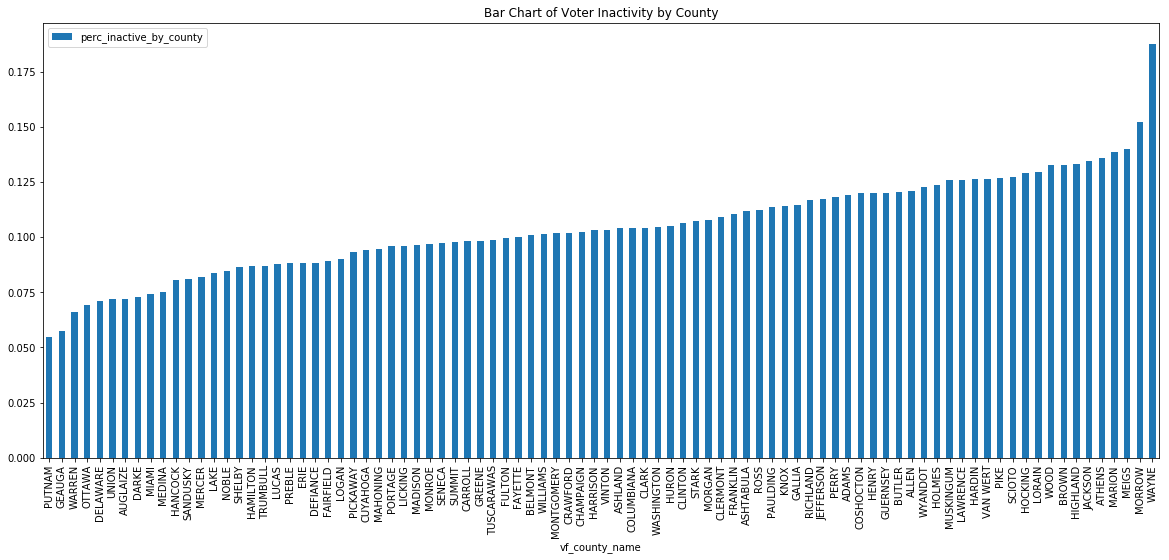

In [22]:
perc_inactive_by_county = df[df['vf_voter_status']=="Inactive"].groupby('vf_county_name').count()['voterbase_id']/df.groupby('vf_county_name').count()['voterbase_id']
data = {
        'perc_inactive_by_county':perc_inactive_by_county
}
inactive_df = pd.DataFrame(data,columns =['perc_inactive_by_county'])
inactive_df.sort_values(['perc_inactive_by_county'],ascending=True, inplace=True)
inactive_df.plot.bar(title='Bar Chart of Voter Inactivity by County', figsize=(20,8),fontsize=10);

#### It ranges from less than 5% to over 17.5%, with most counties having about 10% inactive voters.